# Insurance Cost Analysis

### Objectives
In this project, you will:

* Load the data as a pandas dataframe

* Clean the data, taking care of the blank entries
* Run exploratory data analysis (EDA) and identify the attributes that most affect the charges
* Develop single variable and multi variable Linear Regression models for predicting the charges
* Use Ridge regression to refine the performance of Linear regression models.

### Importing Required Libraries


In [2]:


import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score, train_test_split

### Download the dataset to this lab environment

In [3]:
path = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-Coursera/medical_insurance_dataset.csv'

### Import the dataset

In [4]:
df = pd.read_csv(path, header= None)
df.head()

,0,1,2,3,4,5,6
0,19,1,27.900,0,1,3,16884.92400
1,18,2,33.770,1,0,4,1725.55230
2,28,2,33.000,3,0,4,4449.46200
3,33,2,22.705,0,0,1,21984.47061
4,32,2,28.880,0,0,1,3866.85520


In [5]:
headers = ['Age', 'Gender', 'BMI', 'No_Of_Child', 'Smoker', 'Region', 'Charges']
df.columns = headers

In [6]:
df.replace('?', np.nan, inplace=True)
df.head(10)

,Age,Gender,BMI,No_Of_Child,Smoker,Region,Charges
0,19,1,27.900,0,1,3,16884.92400
1,18,2,33.770,1,0,4,1725.55230
2,28,2,33.000,3,0,4,4449.46200
3,33,2,22.705,0,0,1,21984.47061
4,32,2,28.880,0,0,1,3866.85520
5,31,1,25.740,0,NaN,4,3756.62160
6,46,1,33.440,1,0,4,8240.58960
7,37,1,27.740,3,0,1,7281.50560
8,37,2,29.830,2,0,2,6406.41070
9,60,1,25.840,0,0,1,28923.13692


### Data Wrangling

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2772 entries, 0 to 2771
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          2768 non-null   object 
 1   Gender       2772 non-null   int64  
 2   BMI          2772 non-null   float64
 3   No_Of_Child  2772 non-null   int64  
 4   Smoker       2765 non-null   object 
 5   Region       2772 non-null   int64  
 6   Charges      2772 non-null   float64
dtypes: float64(2), int64(3), object(2)
memory usage: 151.7+ KB


In [8]:
# smoker is a categorical attribute, replace with most frequent entry
is_smoker = df['Smoker'].value_counts().idxmax()
df["Smoker"].replace(np.nan, is_smoker, inplace=True)

# age is a continuous variable, replace with mean age
mean_age = df['Age'].astype('float').mean(axis=0)
df["Age"].replace(np.nan, mean_age, inplace=True)

# Update data types
df[["Age","Smoker"]] = df[["Age","Smoker"]].astype("int")

print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2772 entries, 0 to 2771
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          2772 non-null   int32  
 1   Gender       2772 non-null   int64  
 2   BMI          2772 non-null   float64
 3   No_Of_Child  2772 non-null   int64  
 4   Smoker       2772 non-null   int32  
 5   Region       2772 non-null   int64  
 6   Charges      2772 non-null   float64
dtypes: float64(2), int32(2), int64(3)
memory usage: 130.1 KB
None


In [9]:
df[["Charges"]] = np.round(df[["Charges"]],2)
print(df.head())

   Age  Gender     BMI  No_Of_Child  Smoker  Region   Charges
0   19       1  27.900            0       1       3  16884.92
1   18       2  33.770            1       0       4   1725.55
2   28       2  33.000            3       0       4   4449.46
3   33       2  22.705            0       0       1  21984.47
4   32       2  28.880            0       0       1   3866.86


### Exploratory Data Analysis (EDA)

(0.0, 66902.85800000001)

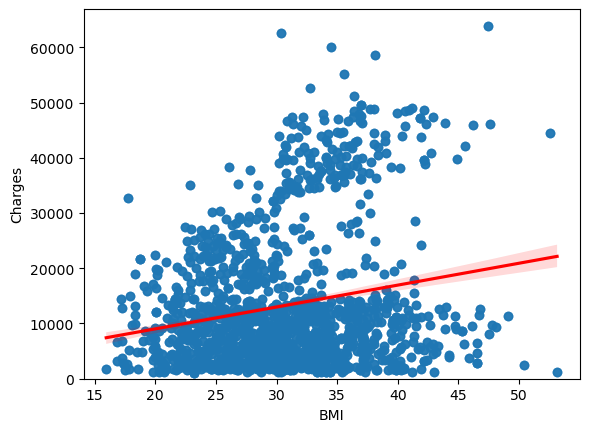

In [10]:
sns.regplot(x="BMI", y="Charges", data=df, line_kws={"color": "red"})
plt.ylim(0,)

<Axes: xlabel='Smoker', ylabel='Charges'>

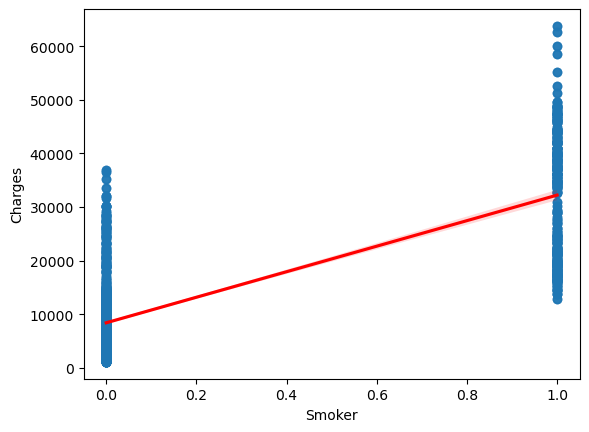

In [11]:
sns.regplot(x='Smoker', y='Charges', data=df, line_kws={'color':'red'})

In [12]:
df.corr()

,Age,Gender,BMI,No_Of_Child,Smoker,Region,Charges
Age,1.000000,-0.026046,0.113048,0.037574,-0.023286,-0.007167,0.298624
Gender,-0.026046,1.000000,0.042924,0.016020,0.082326,0.022213,0.062837
BMI,0.113048,0.042924,1.000000,-0.001492,0.011489,0.271119,0.199846
No_Of_Child,0.037574,0.016020,-0.001492,1.000000,0.006362,-0.025717,0.066442
Smoker,-0.023286,0.082326,0.011489,0.006362,1.000000,0.054077,0.788783
Region,-0.007167,0.022213,0.271119,-0.025717,0.054077,1.000000,0.054058
Charges,0.298624,0.062837,0.199846,0.066442,0.788783,0.054058,1.000000


### Model Development

In [13]:
lr = LinearRegression()
X_data = df[['Smoker']]
Y_data = df[['Charges']]
lr.fit(X_data, Y_data)
lr.score(X_data, Y_data)

0.6221791733924185

In [14]:
lr1 = LinearRegression()
X_data1 = df[['Smoker', 'Age', 'BMI', 'No_Of_Child', 'Region']]
Y_data = df[['Charges']]
lr.fit(X_data1, Y_data)
lr.score(X_data1, Y_data)

0.7504038032968698

In [15]:
Input = [('scale', StandardScaler()), ('polynomial', PolynomialFeatures(include_bias=False)), ('model', LinearRegression())]
pipe = Pipeline(Input)
X_data1 = X_data1.astype(float)
pipe.fit(X_data1, Y_data)
ypipe = pipe.predict(X_data1)
print(r2_score(Y_data, ypipe))

0.8445830237169065


### Model Refinement

In [16]:
x_train, x_test, y_train, y_test = train_test_split(X_data1, Y_data, test_size=0.2, random_state=0)

In [17]:
RidgeModel=Ridge(alpha=0.1)
RidgeModel.fit(x_train, y_train)
yhat = RidgeModel.predict(x_test)
print(r2_score(y_test,yhat))

0.7471450877801722


In [18]:
pr = PolynomialFeatures(degree=2)
x_train_pr = pr.fit_transform(x_train)
x_test_pr = pr.fit_transform(x_test)
RidgeModel.fit(x_train_pr, y_train)
y_hat = RidgeModel.predict(x_test_pr)
print(r2_score(y_test,y_hat))

0.8423833634489714
